In [2]:
import os
import PyPDF2
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

nltk.download('punkt')

# Load converted GloVe model
model_path = "glove.6B.100d.word2vec.txt"
model = KeyedVectors.load_word2vec_format(model_path, binary=False)

def pdf_to_text(file_path):
    text = ""
    with open(file_path, 'rb') as f:
        reader = PyPDF2.PdfReader(f)
        for page in reader.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text
    return text

def sentence_vector(sentence):
    words = word_tokenize(sentence.lower())
    valid_words = [w for w in words if w in model]
    if not valid_words:
        return np.zeros((model.vector_size,))
    return np.mean([model[w] for w in valid_words], axis=0)

def semantic_search_in_pdf(folder_path, user_query):
    query_vec = sentence_vector(user_query)
    results = {}

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(".pdf"):
            file_path = os.path.join(folder_path, filename)
            text = pdf_to_text(file_path)
            sentences = sent_tokenize(text)

            best_idx = -1
            best_score = -1

            for i, sent in enumerate(sentences):
                vec = sentence_vector(sent)
                if np.linalg.norm(vec) == 0:
                    continue
                score = cosine_similarity([query_vec], [vec])[0][0]
                if score > best_score:
                    best_score = score
                    best_idx = i

            if best_idx != -1:
                start = max(0, best_idx - 3)
                end = min(len(sentences), best_idx + 4)
                context = " ".join(sentences[start:end])
                results[filename] = (context, round(best_score, 3))

    return results


# === MAIN ===
if __name__ == "__main__":
    folder = "D:\Project_Apr_2025\DATA_PROTECTION_LAWS"
    query = input("Enter your search query (keyword/phrase): ").strip()

    output = semantic_search_in_pdf(folder, query)

    print("\n Semantic Search Results:")
    for file, (sentence, score) in output.items():
        print(f"\nFile: {file}")
        print(f"Score: {score}")
        print(f"Match: {sentence}")




[nltk_data] Downloading package punkt to C:\Users\JYOTHSNA
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Enter your search query (keyword/phrase): The impact of cross-border or foreign influence on data extraction.

 Semantic Search Results:

File: APPI_Japan.pdf
Score: 0.9509999752044678
Match: () Article 4 Responsibilities of the State-3-The State shall be responsible for compreh ensively formulating and implementing
measures necessary for ensuring the proper handling of personal information inconformity with the purport of this Act. () Article 5 Responsibilities of Local governments
Local governments shall be responsible for formulating and implementing the
measures necessary for ensuring the proper handling of personal information
according to the characteristics of their area in conformity with the purport of this
Act. () Article 6 Legislative Measures, etc. The Government shall take necessary legislative and other measures to ensure
that special measures will be taken for the protection of the personal information
which especially needs to be ensured the stri ct implementation of it

[nltk_data] Downloading package punkt to C:\Users\JYOTHSNA
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Enter your search query (keyword/phrase): In the event of a data breach, what are the potential consequences for individuals and organizations if sensitive personal data is exposed?

Semantic Search Results:

📄 File: GDPR_EU.pdf
Query Relevance Score: 0.9810000061988831
Match Context:
(91)  This should in particular apply to large-scale processing operations which aim to process a considerable amount 
of personal data at regional, national or supranational level and whic h could affect a large number of data 
subjects and which are likely to result in a high risk, for example, on account of their sensitivity , where in 
accordance with the achi eved state of technological kno wledge a new technology is used on a large scale as well 
as to other processing operations which result in a high risk to the rights and freedoms of data subjects, in 
particular where those operations render it more difficult for data subjects to exer cise their rights. A data 4.5.2016 L 119/17 Official Jour nal

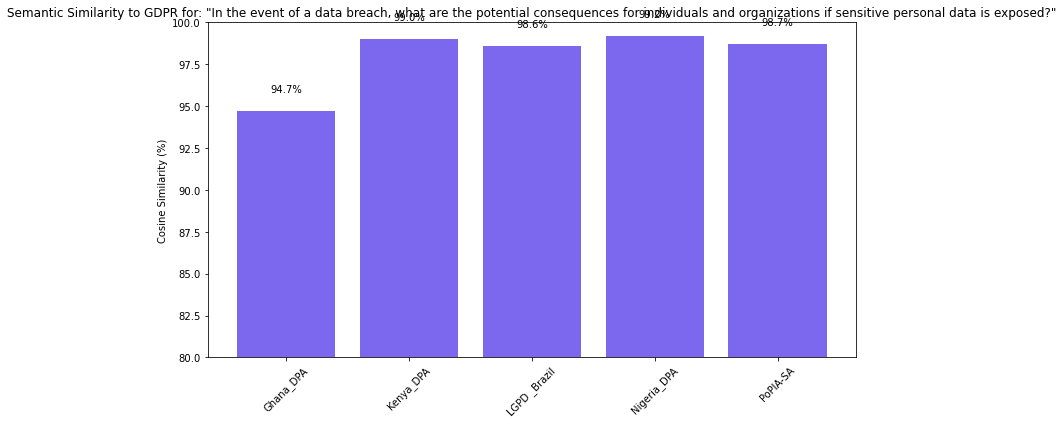

In [1]:
import matplotlib.pyplot as plt

import os
import PyPDF2
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

nltk.download('punkt')

# Load converted GloVe model
model_path = "glove.6B.100d.word2vec.txt"
model = KeyedVectors.load_word2vec_format(model_path, binary=False)

def pdf_to_text(file_path):
    text = ""
    with open(file_path, 'rb') as f:
        reader = PyPDF2.PdfReader(f)
        for page in reader.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text
    return text

def sentence_vector(sentence):
    words = word_tokenize(sentence.lower())
    valid_words = [w for w in words if w in model]
    if not valid_words:
        return np.zeros((model.vector_size,))
    return np.mean([model[w] for w in valid_words], axis=0)

def semantic_search_in_pdf(folder_path, user_query):
    query_vec = sentence_vector(user_query)
    results = {}

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(".pdf"):
            file_path = os.path.join(folder_path, filename)
            text = pdf_to_text(file_path)
            sentences = sent_tokenize(text)

            best_idx = -1
            best_score = -1

            for i, sent in enumerate(sentences):
                vec = sentence_vector(sent)
                if np.linalg.norm(vec) == 0:
                    continue
                score = cosine_similarity([query_vec], [vec])[0][0]
                if score > best_score:
                    best_score = score
                    best_idx = i

            if best_idx != -1:
                start = max(0, best_idx - 3)
                end = min(len(sentences), best_idx + 4)
                context = " ".join(sentences[start:end])
                results[filename] = (context, round(best_score, 3))

    return results

def paragraph_vector(text):
    words = word_tokenize(text.lower())
    valid_words = [w for w in words if w in model]
    if not valid_words:
        return np.zeros((model.vector_size,))
    return np.mean([model[w] for w in valid_words], axis=0)

# === MAIN ===
if __name__ == "__main__":
    folder = r"D:\Project_Apr_2025\Global South"
    query = input("Enter your search query (keyword/phrase): ").strip()

    output = semantic_search_in_pdf(folder, query)

    print("\nSemantic Search Results:")
    gdpr_context = None
    gdpr_vec = None
    sim_scores = {}

    for file, (context, score) in output.items():
        print(f"\n📄 File: {file}")
        print(f"Query Relevance Score: {score}")
        print(f"Match Context:\n{context}\n")

        vec = paragraph_vector(context)

        if "gdpr" in file.lower():  # Identify GDPR
            gdpr_context = context
            gdpr_vec = vec
            sim_scores[file] = 1.0  # 100% similarity with itself
        else:
            sim_scores[file] = cosine_similarity([vec], [gdpr_vec])[0][0] if gdpr_vec is not None else 0.0

    # === Plot similarity to GDPR ===
    if gdpr_vec is not None:
        print("Similarity to GDPR:")
        labels = []
        values = []

        for file, score in sim_scores.items():
            country = os.path.splitext(file)[0]
            print(f"{country}: {round(score * 100, 2)}%")
            labels.append(country)
            values.append(round(score * 100, 2))
        labels.pop(0)
        values.pop(0)
        plt.figure(figsize=(10, 6))
        bars = plt.bar(labels, values, color='mediumslateblue')
        #plt.title(f"Semantic Similarity to GDPR for: \"{query}\"")
        plt.ylabel("Cosine Similarity (%)")
        plt.ylim(80, 100)

        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.1f}%", ha='center', va='bottom')

        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ GDPR file not found in the folder! Make sure the file name contains 'gdpr'.")


[nltk_data] Downloading package punkt to C:\Users\JYOTHSNA
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Enter your search query (keyword/phrase): What legal and organizational actions are taken when data protection regulations are violated?

Semantic Search Results:

📄 File: GDPR_EU.pdf
Query Relevance Score: 0.9580000042915344
Match Context:
Article 89 
Safeguards and derogations relating to processing for archiving pur poses in the public interest, 
scientif ic or histor ical research pur poses or statist ical pur poses 
1. Processing for archiv ing purposes in the public interest, scientifi c or histo rical researc h purposes or statistical 
purposes, shall be subject to appropr iate safeguards, in accordance with this Regulation, for the rights and freedoms of 
the data subject. Those safeg uards shall ensure that technical and organisational measures are in place in particular in 4.5.2016 L 119/84 Official Jour nal of the European Union EN     order to ensure respect for the principle of data minimisation. Those measures may include pseudony misation provided 
that those purposes ca

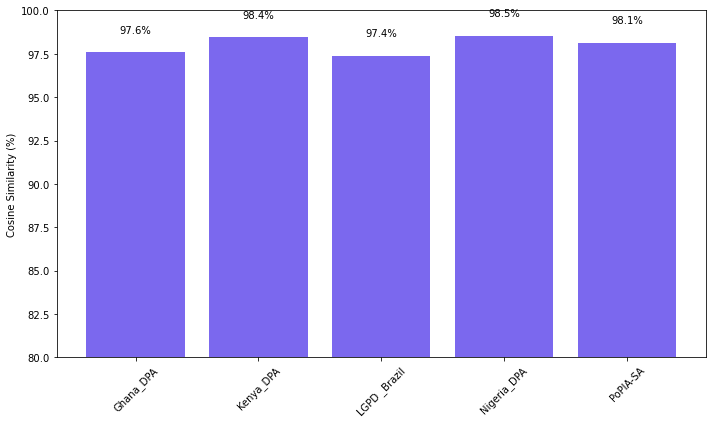

In [3]:
import matplotlib.pyplot as plt

import os
import PyPDF2
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

nltk.download('punkt')


model_path = "glove.6B.100d.word2vec.txt"
model = KeyedVectors.load_word2vec_format(model_path, binary=False)

def pdf_to_text(file_path):
    text = ""
    with open(file_path, 'rb') as f:
        reader = PyPDF2.PdfReader(f)
        for page in reader.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text
    return text

def sentence_vector(sentence):
    words = word_tokenize(sentence.lower())
    valid_words = [w for w in words if w in model]
    if not valid_words:
        return np.zeros((model.vector_size,))
    return np.mean([model[w] for w in valid_words], axis=0)

def semantic_search_in_pdf(folder_path, user_query):
    query_vec = sentence_vector(user_query)
    results = {}

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(".pdf"):
            file_path = os.path.join(folder_path, filename)
            text = pdf_to_text(file_path)
            sentences = sent_tokenize(text)

            best_idx = -1
            best_score = -1

            for i, sent in enumerate(sentences):
                vec = sentence_vector(sent)
                if np.linalg.norm(vec) == 0:
                    continue
                score = cosine_similarity([query_vec], [vec])[0][0]
                if score > best_score:
                    best_score = score
                    best_idx = i

            if best_idx != -1:
                start = max(0, best_idx - 3)
                end = min(len(sentences), best_idx + 4)
                context = " ".join(sentences[start:end])
                results[filename] = (context, round(best_score, 3))

    return results

def paragraph_vector(text):
    words = word_tokenize(text.lower())
    valid_words = [w for w in words if w in model]
    if not valid_words:
        return np.zeros((model.vector_size,))
    return np.mean([model[w] for w in valid_words], axis=0)

# === MAIN ===
if __name__ == "__main__":
    folder = r"D:\Project_Apr_2025\Global South"
    query = input("Enter your search query (keyword/phrase): ").strip()

    output = semantic_search_in_pdf(folder, query)

    print("\nSemantic Search Results:")
    gdpr_context = None
    gdpr_vec = None
    sim_scores = {}

    for file, (context, score) in output.items():
        print(f"\n📄 File: {file}")
        print(f"Query Relevance Score: {score}")
        print(f"Match Context:\n{context}\n")

        vec = paragraph_vector(context)

        if "gdpr" in file.lower():  # Identify GDPR
            gdpr_context = context
            gdpr_vec = vec
            sim_scores[file] = 1.0  # 100% similarity with itself
        else:
            sim_scores[file] = cosine_similarity([vec], [gdpr_vec])[0][0] if gdpr_vec is not None else 0.0

    # === Plot similarity to GDPR ===
    if gdpr_vec is not None:
        print("Similarity to GDPR:")
        labels = []
        values = []

        for file, score in sim_scores.items():
            country = os.path.splitext(file)[0]
            print(f"{country}: {round(score * 100, 2)}%")
            labels.append(country)
            values.append(round(score * 100, 2))
        labels.pop(0)
        values.pop(0)
        plt.figure(figsize=(10, 6))
        bars = plt.bar(labels, values, color='mediumslateblue')
        #plt.title(f"Semantic Similarity to GDPR for: \"{query}\"")
        plt.ylabel("Cosine Similarity (%)")
        plt.ylim(80, 100)

        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.1f}%", ha='center', va='bottom')

        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ GDPR file not found in the folder! Make sure the file name contains 'gdpr'.")
